### Loading libraries

In [2]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(ggrepel)
library(stargazer)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.6      ✔ rsample      0.1.0 
✔ dials        0.0.9      ✔ tune         0.1.5 
✔ infer        0.5.4      ✔ workflows    0.2.2 
✔ modeldata    0.1.0      ✔ workflowsets 0.0.2 
✔ parsnip      0.1.5      ✔ yardstick    0.0.8 
✔ recipes      0.1.16     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spe

### Utility functions

In [3]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

### Loading data

In [4]:
path <- ""

names <- read.table(paste(path, "spotify-names.txt", sep = ""),header = TRUE)
songs <- read.table(paste(path, "spotify-extr.txt", sep = ""),
                    sep = " ", header = TRUE) %>%
    as_tibble() %>%
    mutate(name = names$x,
           key = factor(key),
           mode = factor(mode),
           pop.class = factor(pop.class)) %>%
    relocate(c(pop.class, popularity)) %>%
    relocate(c(key, mode), .after=last_col())

songs.quant <- songs %>% select(popularity:tempo)

head(songs)

pop.class popularity valence year acousticness danceability duration energy
1 C         25         0.647   1975 0.4490       0.376        298840   0.827 
2 B         42         0.150   2008 0.8990       0.508        236800   0.169 
3 A         65         0.423   2007 0.0185       0.470        301093   0.878 
4 C         36         0.302   1995 0.0384       0.176        142200   0.980 
5 C         38         0.828   1994 0.5310       0.705        187800   0.625 
6 A         68         0.489   2018 0.3710       0.856        324189   0.694 
  instrumentalness liveness loudness speechiness tempo  
1 7.88e-03         0.466     -7.604  0.3990      170.475
2 1.12e-05         0.136    -11.332  0.0553      107.477
3 8.39e-02         0.276     -5.576  0.0377      150.093
4 5.52e-01         0.237     -3.154  0.0721      172.566
5 7.73e-06         0.348    -11.963  0.0639       97.831
6 0.00e+00         0.109     -4.393  0.1690      122.080
  name                             key mode
1 William Tell Overture            B   1   
2 Everything I Know                Ab  1   
3 Rest My Chemistry                B   0   
4 Stutter                          B   1   
5 Wanna Do My Thing                G   0   
6 Mona Lisa (feat. Kendrick Lamar) D   1

## Exploratory statistics

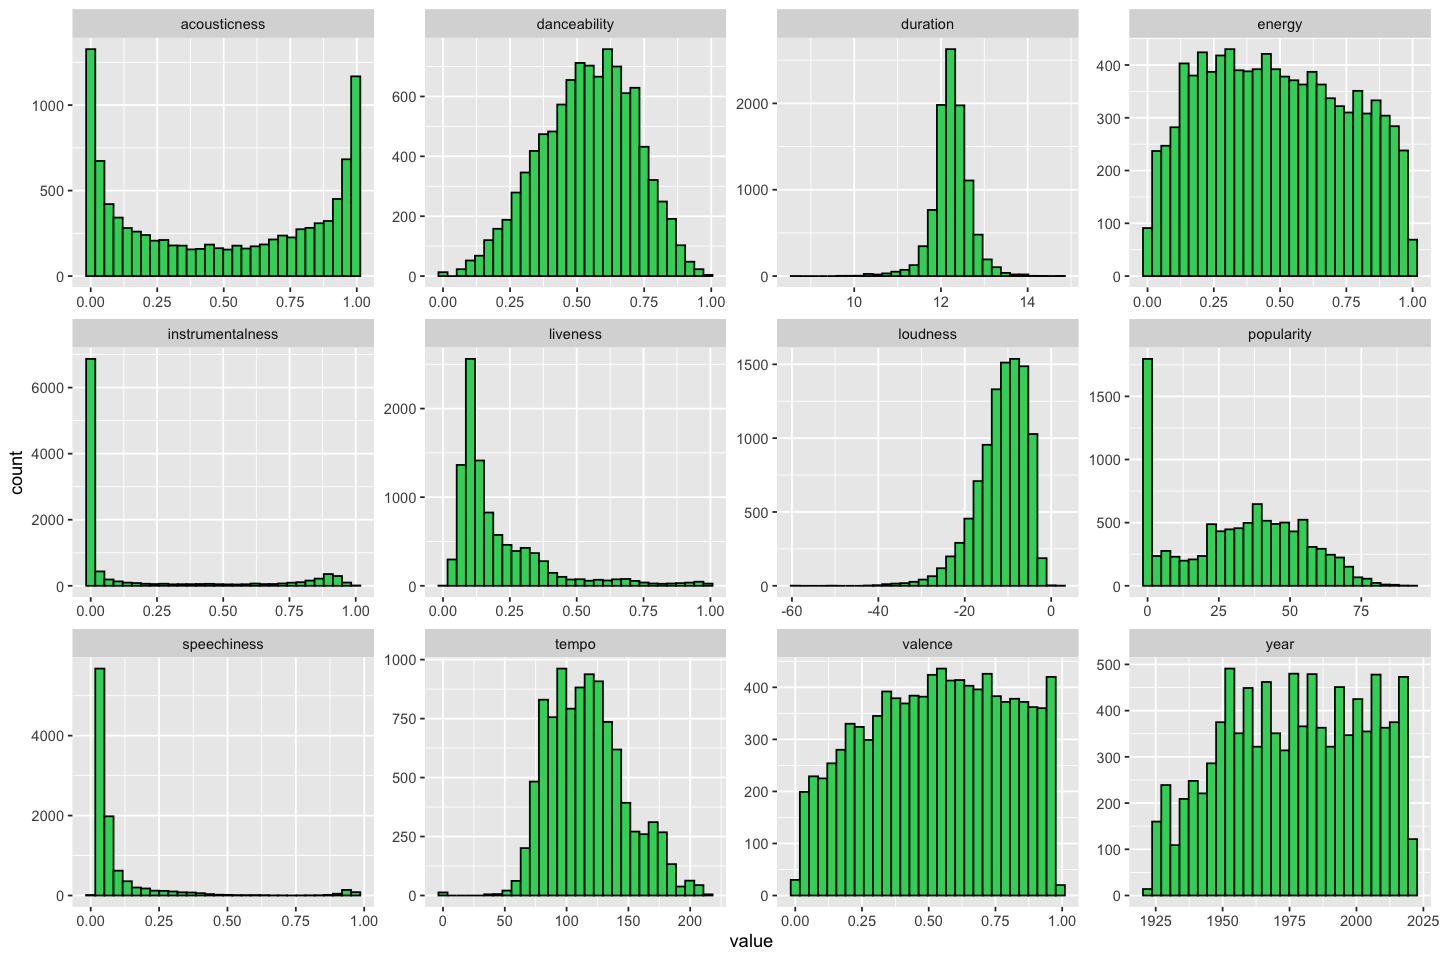

In [5]:
fig(12,8)
songs.quant %>%
    select(c(popularity:tempo)) %>%
    #filter(speechiness < .75) %>%
    mutate(duration=log(duration)) %>%
    pivot_longer(cols=everything(), names_to='variable', values_to='value') %>%
ggplot() +
    geom_histogram(aes(value), fill='#2FD565', color='#000000', bins=30) +
    facet_wrap(~variable, scales='free')

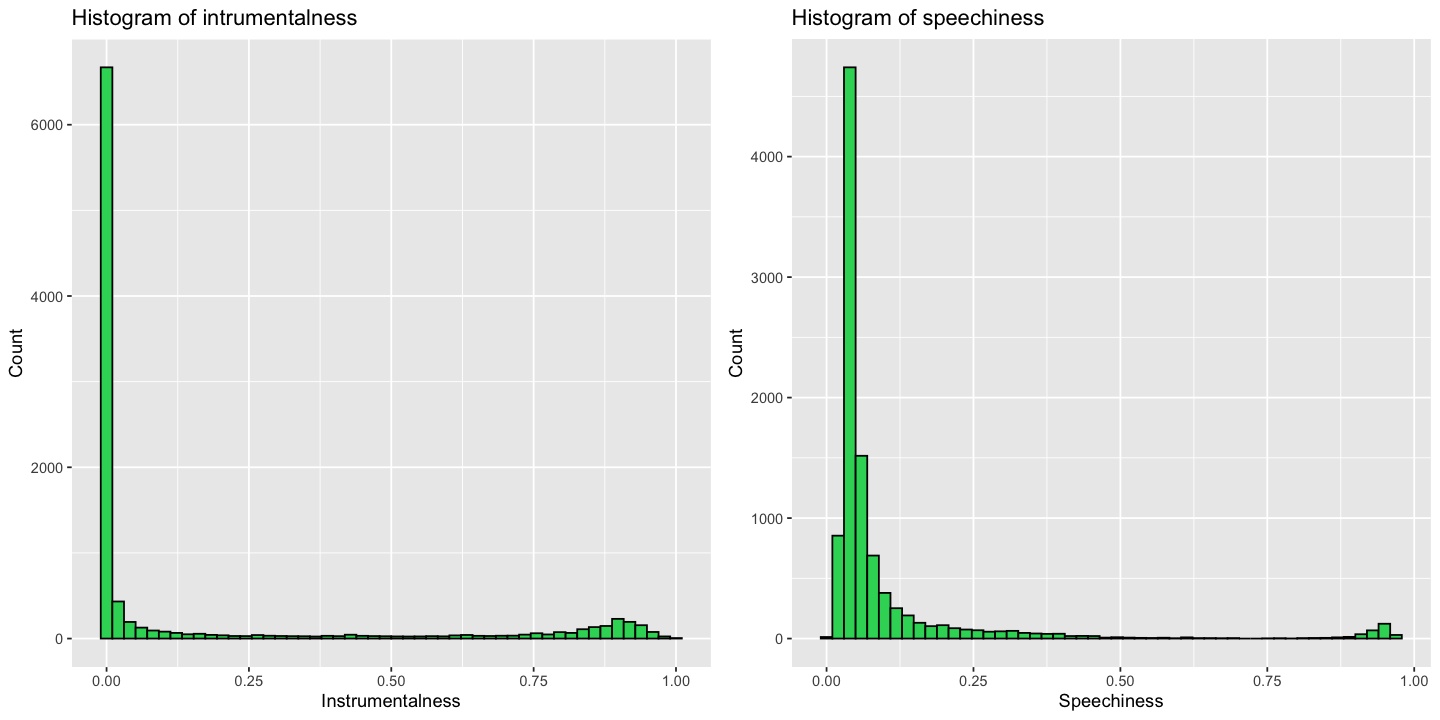

In [7]:
fig(12,6)
p1 <- ggplot(songs, aes(x=instrumentalness)) + 
    geom_histogram(fill='#2FD565', color='#000000', bins=50) +
    labs(title='Histogram of intrumentalness', x='Instrumentalness', y='Count')


p2 <- ggplot(songs, aes(x=speechiness)) + 
    geom_histogram(fill='#2FD565', color='#000000', bins=50) +
    labs(title='Histogram of speechiness', x='Speechiness', y='Count')

grid.arrange(p1,p2,nrow=1)

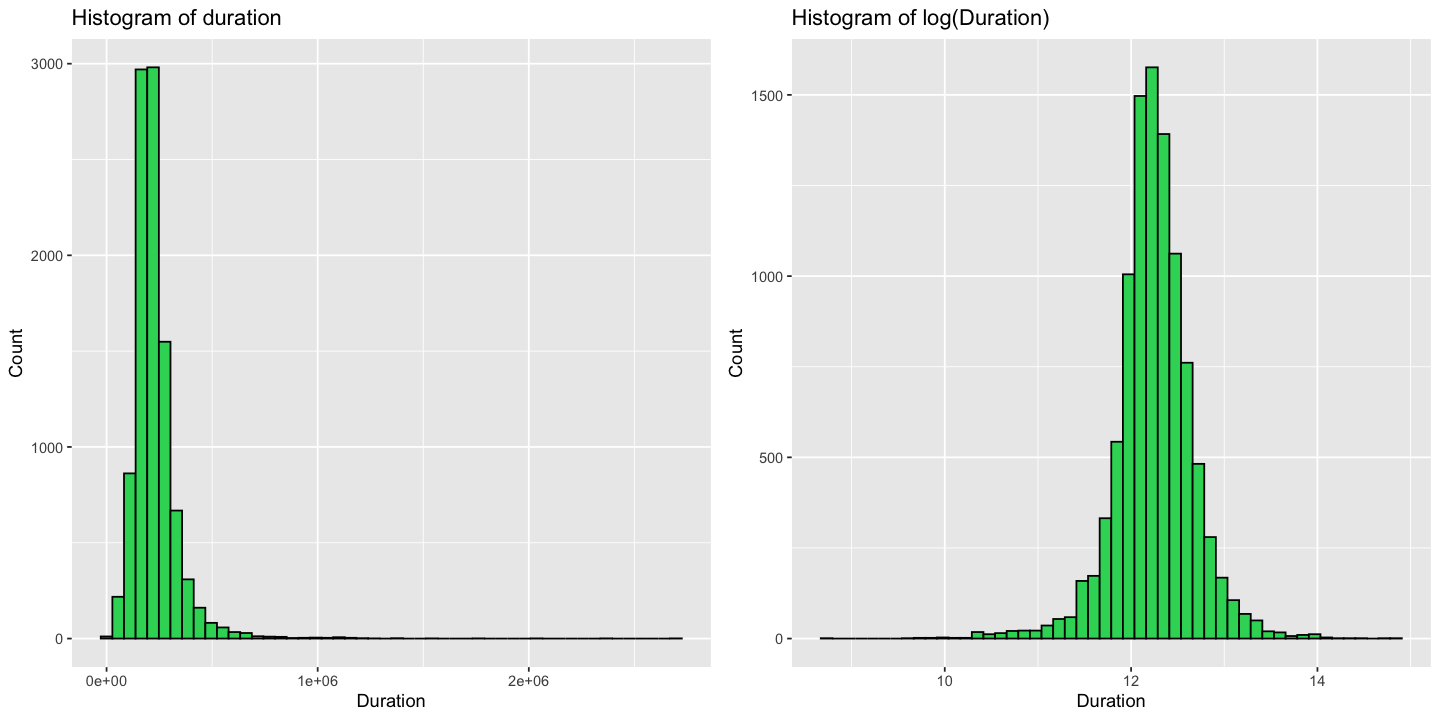

In [31]:
fig(12,6)
p1 <- ggplot(songs, aes(x=duration)) + 
    geom_histogram(fill='#2FD565', color='#000000', bins=50) + 
    labs(title='Histogram of duration', x='Duration', y='Count')

p2 <- ggplot(songs, aes(x=log(duration))) + 
    geom_histogram(fill='#2FD565', color='#000000', bins=50) +
    labs(title='Histogram of log(Duration)', x='Duration', y='Count')

grid.arrange(p1,p2,nrow=1)

In [9]:
songs %>%
    filter(instrumentalness > .75)

pop.class popularity valence year acousticness danceability duration
1    D          0         0.7990  1951 0.99100      0.7930       115453  
2    D          0         0.0762  1946 0.92100      0.1880       206040  
3    D          0         0.1700  1942 0.04690      0.6060       197825  
4    C         33         0.3460  1973 0.96700      0.2390       234027  
5    C         31         0.0397  1960 0.93500      0.3840       279373  
6    D          0         0.9660  1944 0.98600      0.5330       163382  
7    D          0         0.8260  1942 0.99500      0.7170       171508  
8    D         16         0.4550  1958 0.15700      0.4870       152587  
9    C         40         0.0806  1999 0.04100      0.6690       315160  
10   D         16         0.5940  1959 0.97100      0.5300       225147  
11   D         11         0.4800  1949 0.96100      0.4010       173653  
12   C         39         0.0645  1976 0.88200      0.3520       568947  
13   D          0         0.9090  1948 0.90900      0.5070       202707  
14   D         11         0.2430  1963 0.83700      0.5020       149680  
15   D          0         0.7010  1950 0.99500      0.5790       212387  
16   D          0         0.0357  1951 0.99100      0.1480       578573  
17   D          0         0.0348  1935 0.98200      0.0603       454827  
18   D          9         0.1060  1954 0.92300      0.1690       175640  
19   D          0         0.0385  1941 0.96200      0.1950       700773  
20   D          1         0.0388  1946 0.98900      0.0777       263000  
21   C         31         0.6450  1992 0.24200      0.7550        32867  
22   D          0         0.0673  1948 0.76100      0.0637       233440  
23   B         55         0.3000  2015 0.99000      0.4210       175093  
24   D          0         0.2430  2018 0.00382      0.5600       510469  
25   D          9         0.1540  1956 0.98600      0.1780       108533  
26   D          3         0.1100  1946 0.99600      0.2980       196173  
27   D          0         0.8410  1942 0.18000      0.7390       189962  
28   D         20         0.1870  1965 0.97900      0.3530       270387  
29   C         34         0.9580  1975 0.15300      0.6810       258973  
30   D         20         0.9030  1957 0.99300      0.3630        53000  
⋮    ⋮         ⋮          ⋮       ⋮    ⋮            ⋮            ⋮       
1285 D         19         0.4950  1928 9.91e-01     0.5950        194800 
1286 C         30         0.7250  1957 9.95e-01     0.3370        114760 
1287 D          0         0.4890  1939 9.86e-01     0.4340        185080 
1288 C         38         0.7950  1969 3.89e-03     0.4120        156560 
1289 D          0         0.5880  1924 9.96e-01     0.6340        164533 
1290 D          7         0.8380  1956 9.95e-01     0.5490        182446 
1291 C         25         0.7330  1969 4.72e-02     0.5660        159267 
1292 C         21         0.8290  1968 3.92e-03     0.5640         92533 
1293 D         10         0.4350  1938 6.46e-01     0.5800         55227 
1294 B         49         0.0238  2012 3.71e-01     0.0658        570603 
1295 D          0         0.5310  1951 9.32e-01     0.3880        366133 
1296 D         17         0.0379  1955 9.33e-01     0.0806        227667 
1297 C         34         0.9610  1985 7.48e-02     0.7250        203267 
1298 D         13         0.4570  1953 9.62e-01     0.4020        306867 
1299 D          0         0.5460  1940 9.93e-01     0.3610        193653 
1300 D          1         0.2800  1946 9.78e-01     0.1540        174467 
1301 D          0         0.0383  1941 9.96e-01     0.4020        359413 
1302 D          0         0.0355  1949 9.03e-01     0.1220        528200 
1303 C         40         0.2360  1996 2.71e-05     0.2900        348640 
1304 D          0         0.9210  1940 9.94e-01     0.4340        186640 
1305 D          0         0.1540  1951 9.82e-01     0.3320       1210933 
1306 C         36         0.0379  1983 9.88e-01     0.2730        292680 
1307 D   

In [10]:
fig(15,10)
songs.quant %>%
    mutate(duration=log(duration)) %>%
    pivot_longer(cols=!popularity, names_to='variable', values_to='value') %>%
ggplot() +
    geom_point(aes(value, popularity), size=.7, alpha=.3) + 
    facet_wrap(~variable, scales='free') + 
    theme(text=element_text(size=14))

In [11]:
fig(15,10)
songs %>%
    mutate(duration=log(duration)) %>%
    select(c(pop.class, valence:tempo)) %>%
    pivot_longer(cols=!pop.class, names_to='variable', values_to='value') %>%
ggplot() +
    geom_jitter(aes(value, pop.class), size=.7, alpha=.3) + 
    facet_wrap(~variable, scales='free') +
    scale_y_discrete(limits=rev)

corrplot 0.84 loaded



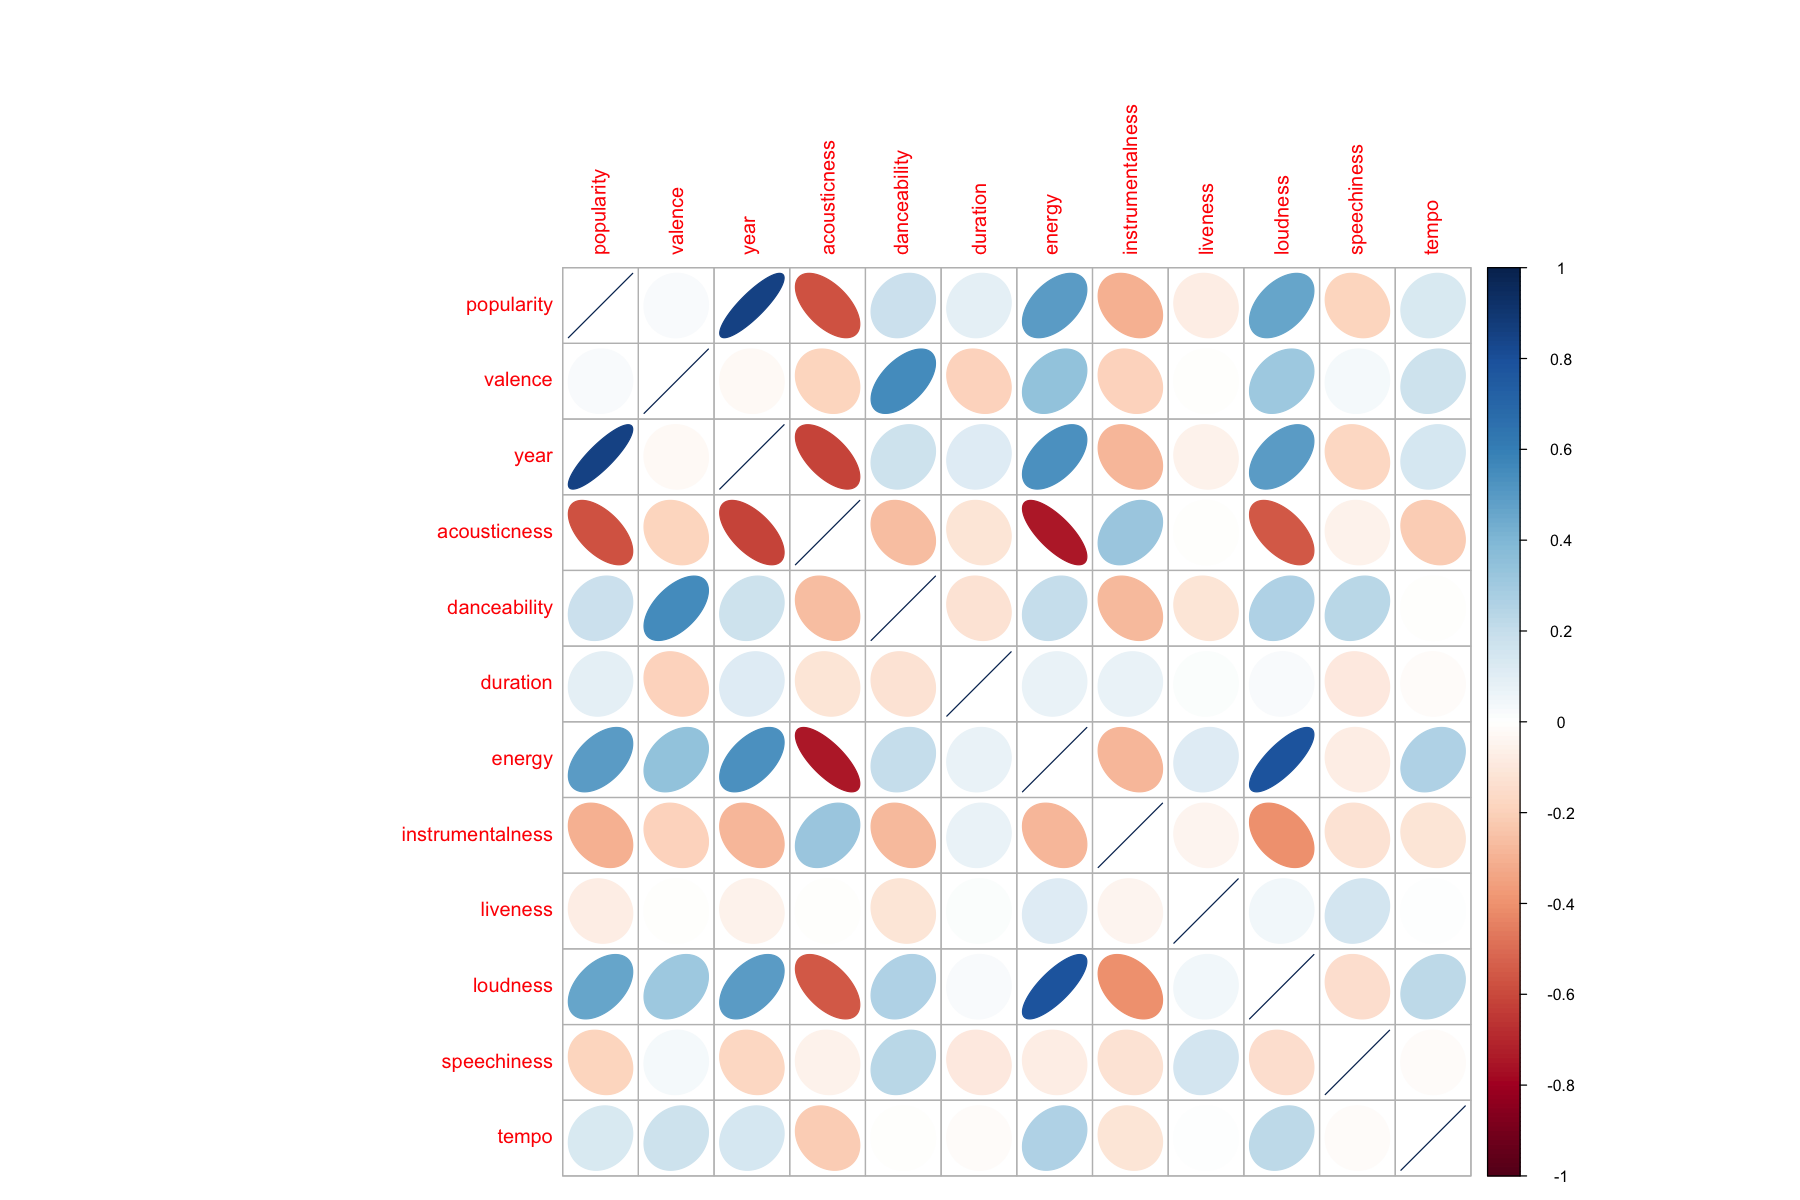

In [12]:
library(corrplot)
cormat <- cor(songs.quant)
corrplot(cormat, method="ellipse")

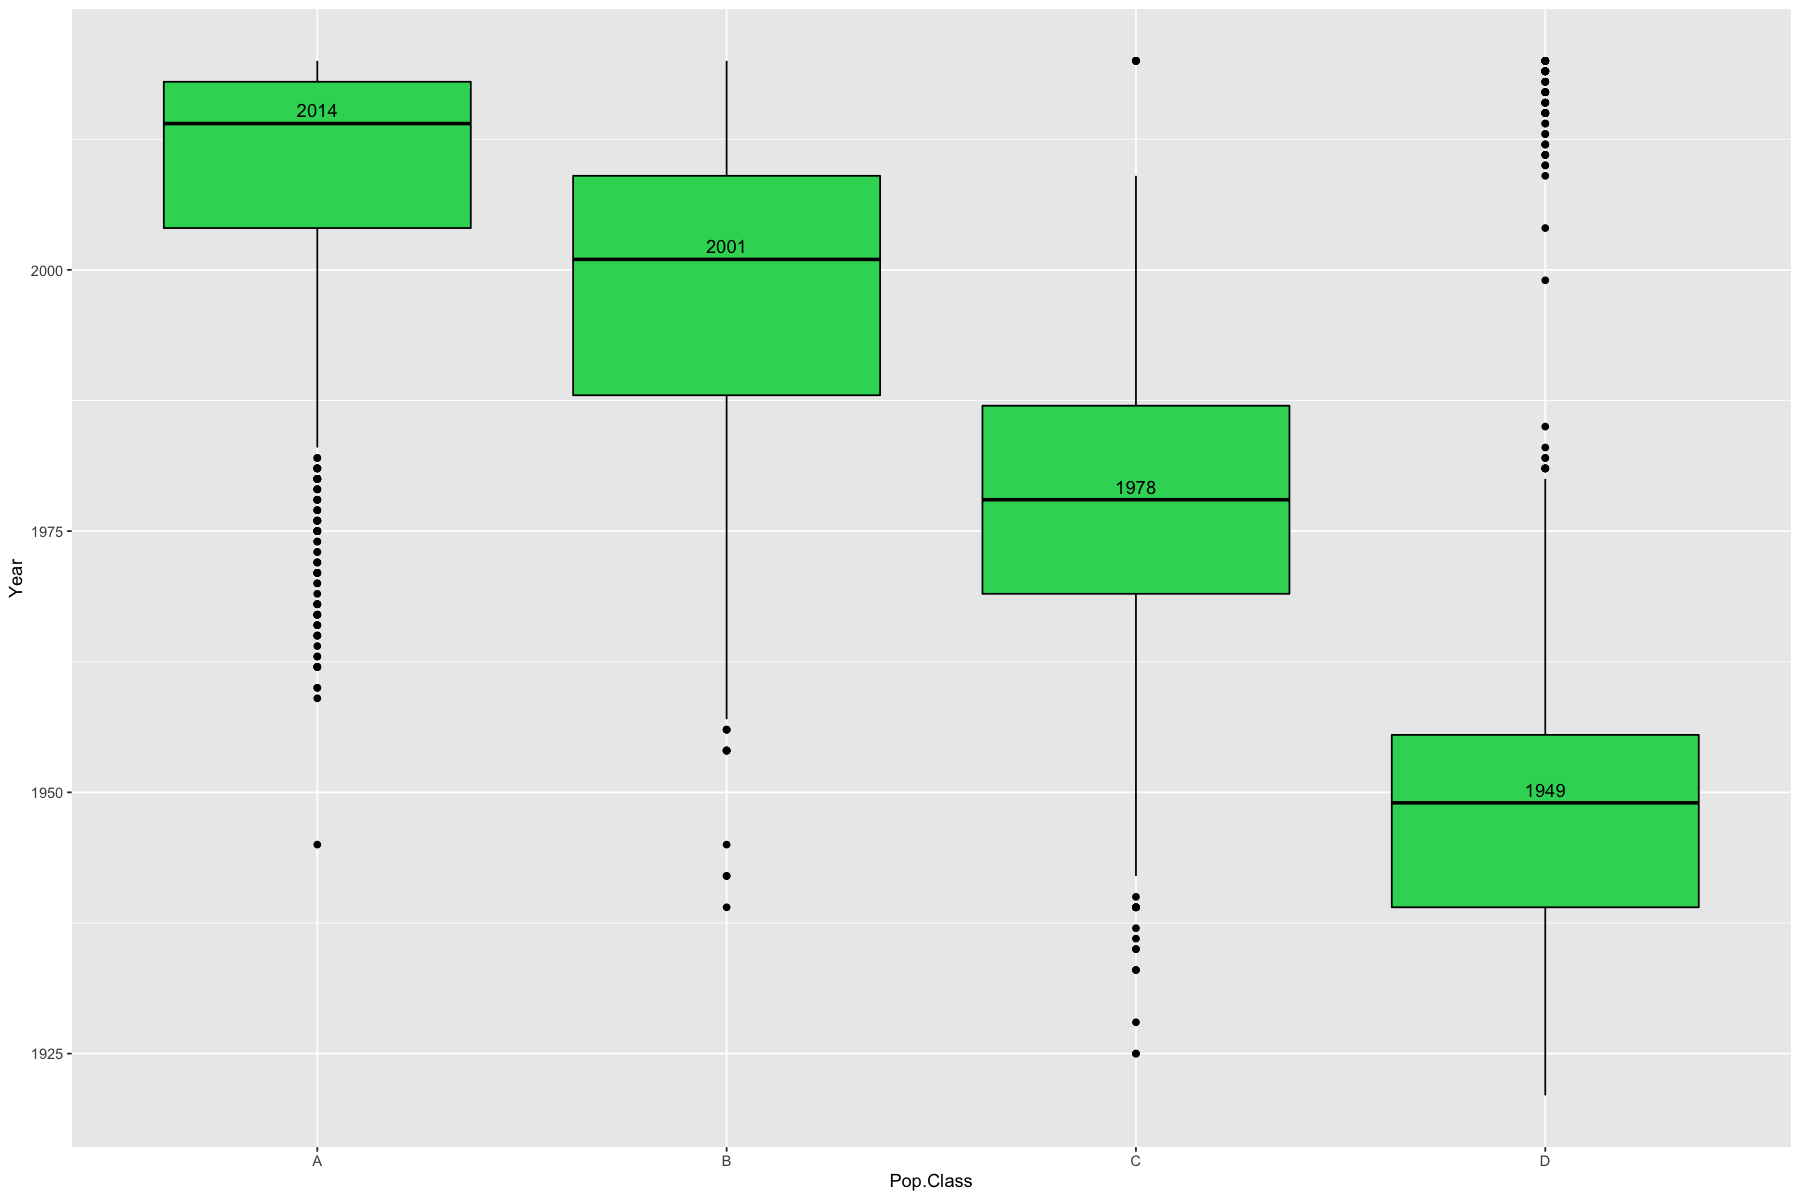

In [13]:
fun_median <- function(x){
  return(data.frame(y=median(x),label=median(x,na.rm=T)))}

ggplot(songs, aes(x = pop.class, y = year)) + 
    geom_boxplot(fill='#2FD565', color='#000000') +
    labs(x="Pop.Class", y="Year") + 
    stat_summary(fun.data = fun_median, geom="text", vjust=-0.5)


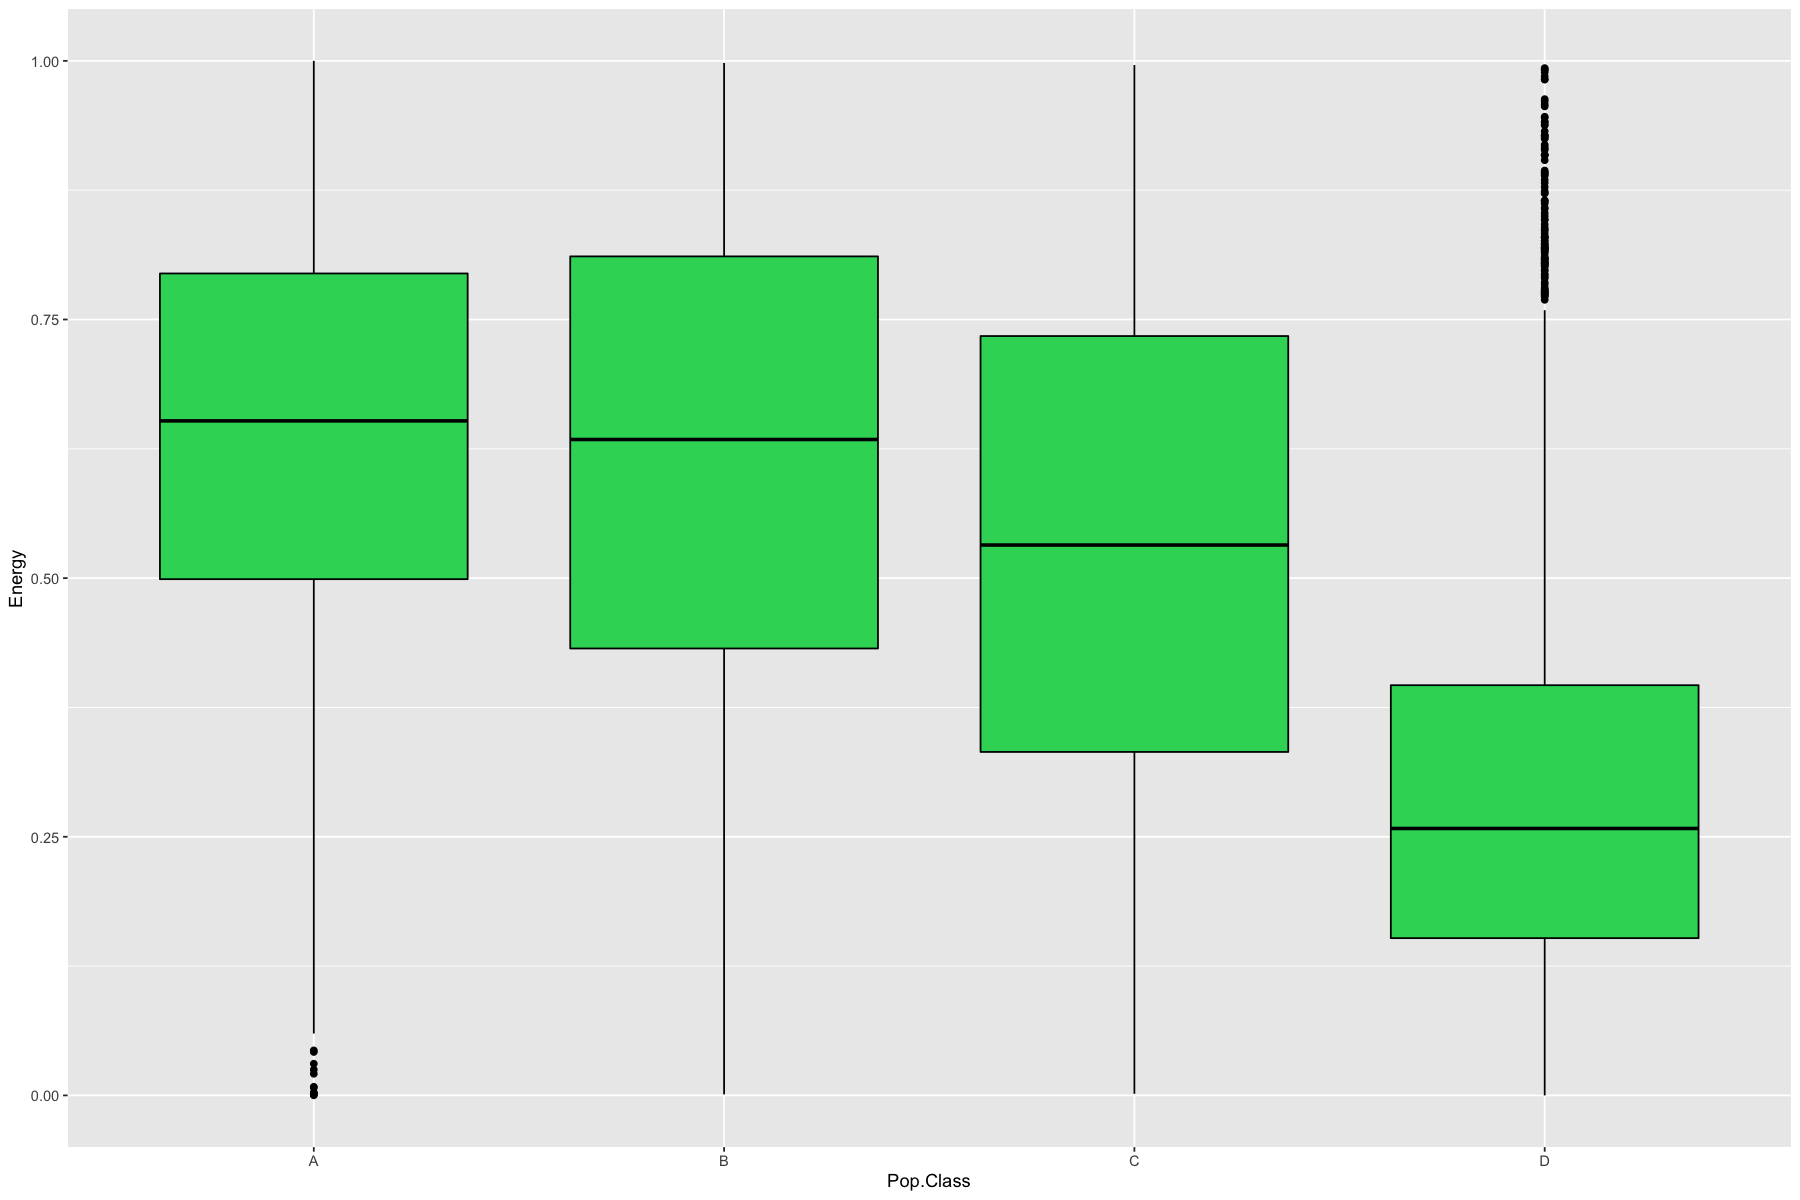

In [14]:
ggplot(songs, aes(x = pop.class, y = energy)) + 
    geom_boxplot(fill='#2FD565', color='#000000') +
    labs(x="Pop.Class", y="Energy") 

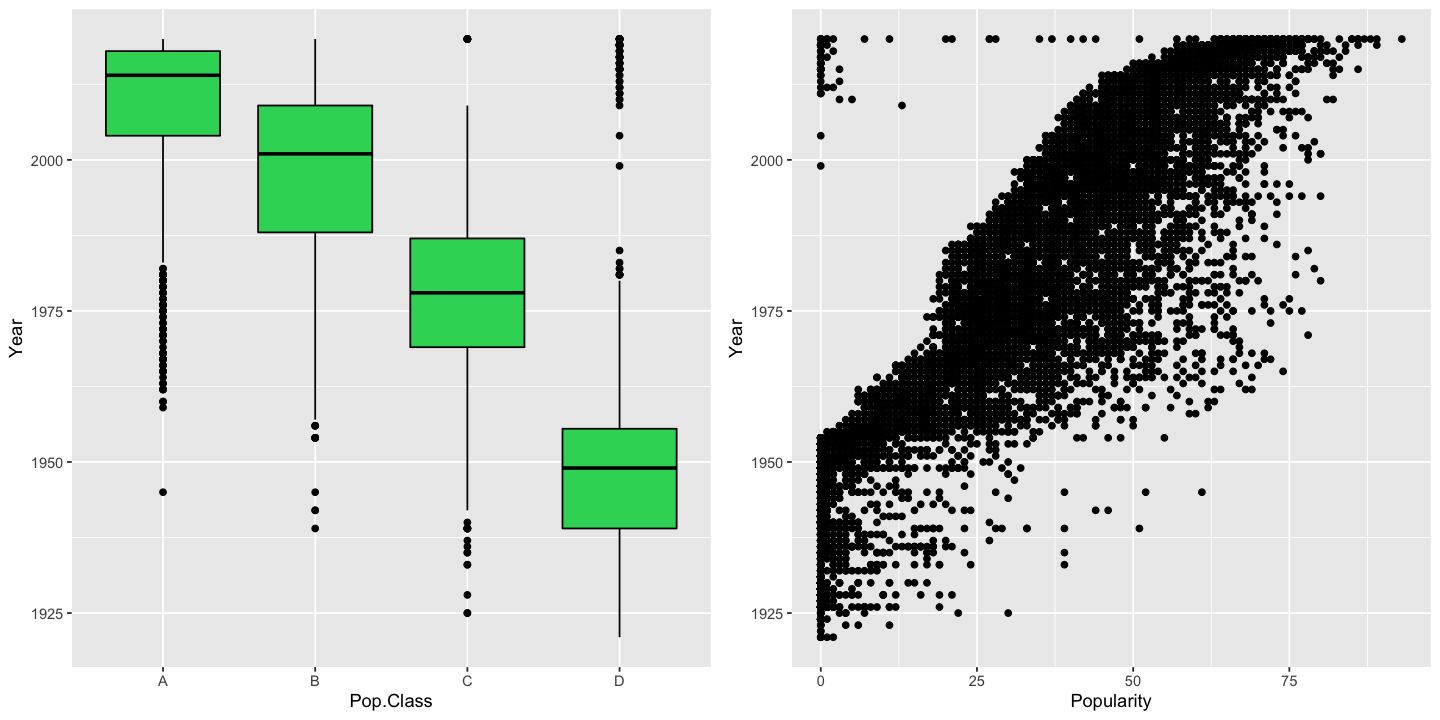

In [15]:
fig(12,6)
p1 <- ggplot(songs, aes(x = pop.class, y = year)) + 
    geom_boxplot(fill='#2FD565', color='#000000') +
    labs(x="Pop.Class", y="Year")

p2 <- ggplot(songs, aes(x = popularity, y = year)) + 
    geom_point() +
    labs(x="Popularity", y="Year")

grid.arrange(p1, p2, nrow=1)

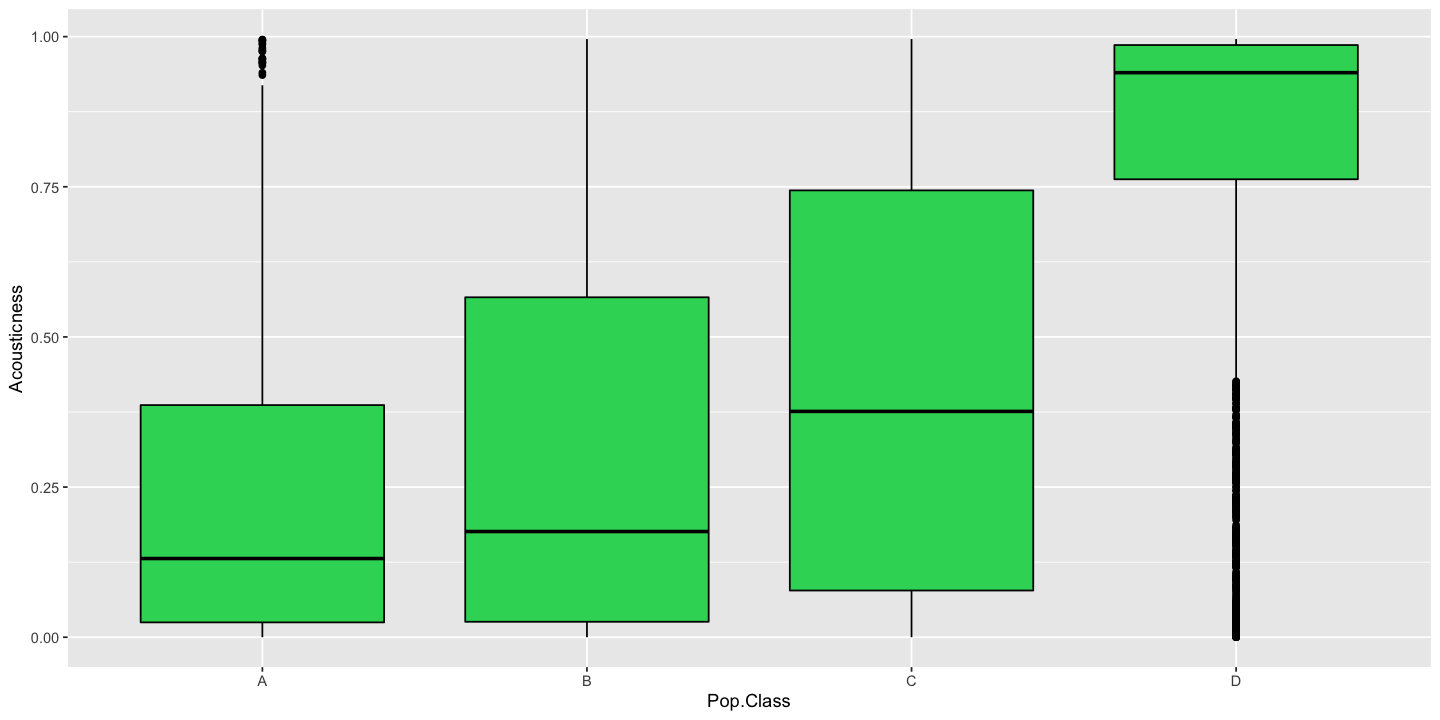

In [16]:
ggplot(songs, aes(x = pop.class, y = acousticness)) + 
    geom_boxplot(fill='#2FD565', color='#000000') +
    labs(x="Pop.Class", y="Acousticness")

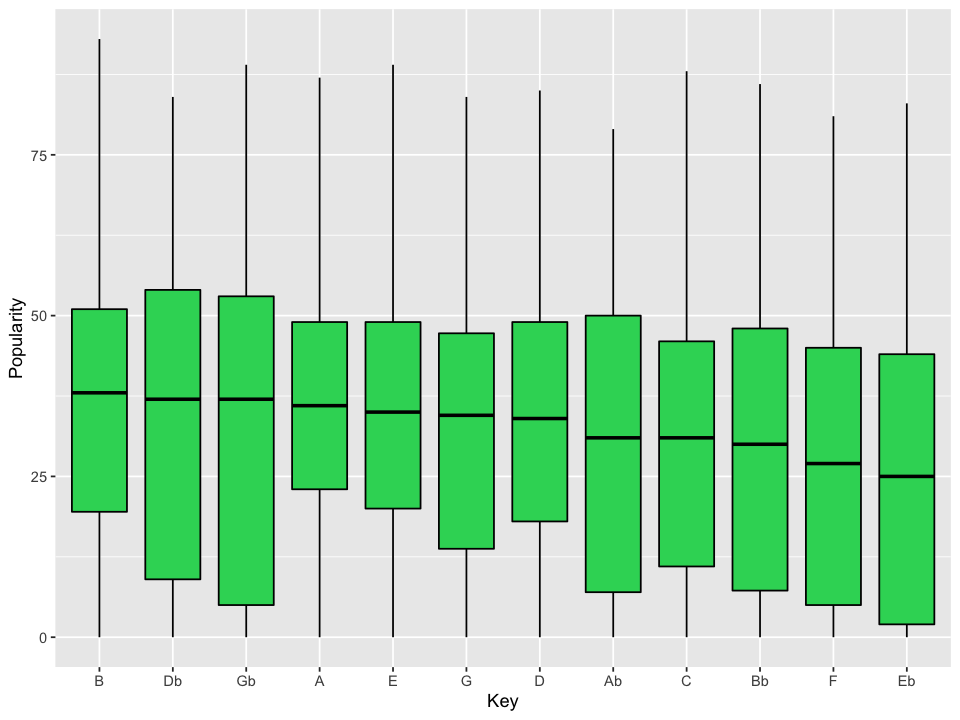

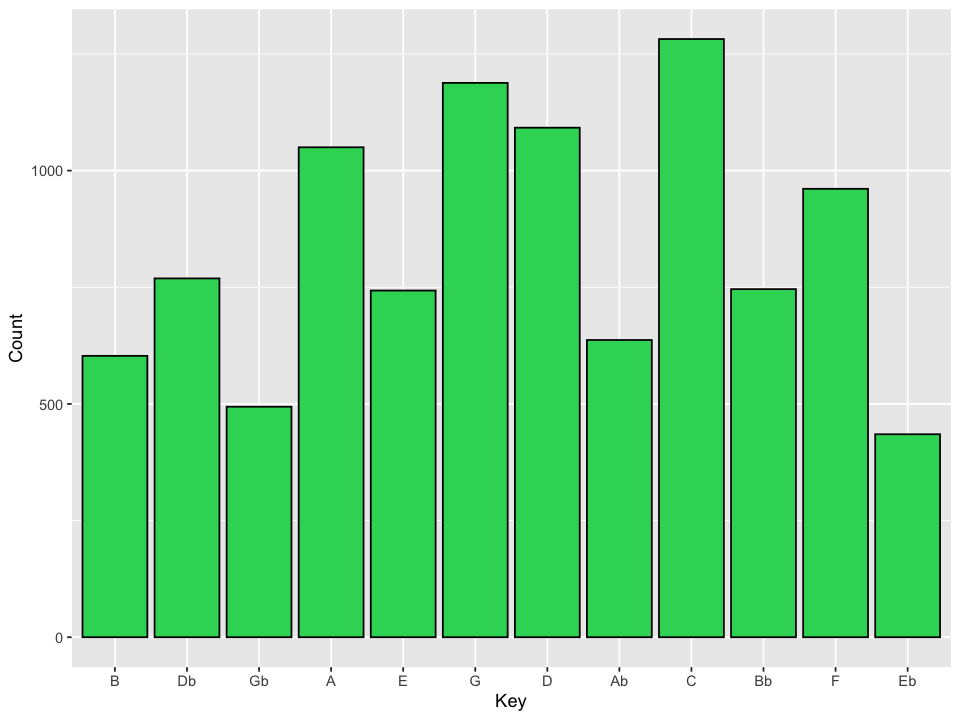

In [17]:
fig(8,6)
songs %>%
ggplot() +
    geom_boxplot(aes(x=reorder(key, -popularity, FUN=median), y=popularity), fill='#2FD565', color='#000000') +
    labs(x='Key', y='Popularity')


songs %>%
ggplot() +
    geom_bar(stat='count', aes(reorder(key, -popularity, FUN=median)), fill='#2FD565', color='#000000') +
    labs(x='Key', y='Count')

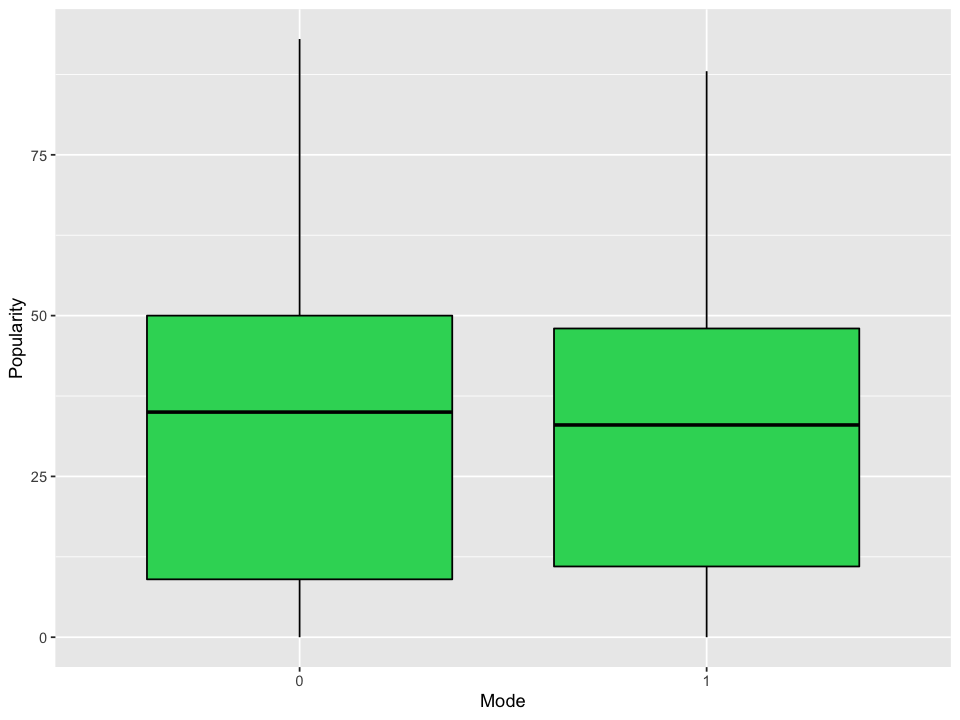

In [18]:
fig(8,6)
songs %>%
ggplot() +
    geom_boxplot(aes(mode, popularity), fill='#2FD565', color='#000000') +
    labs(x='Mode', y='Popularity')

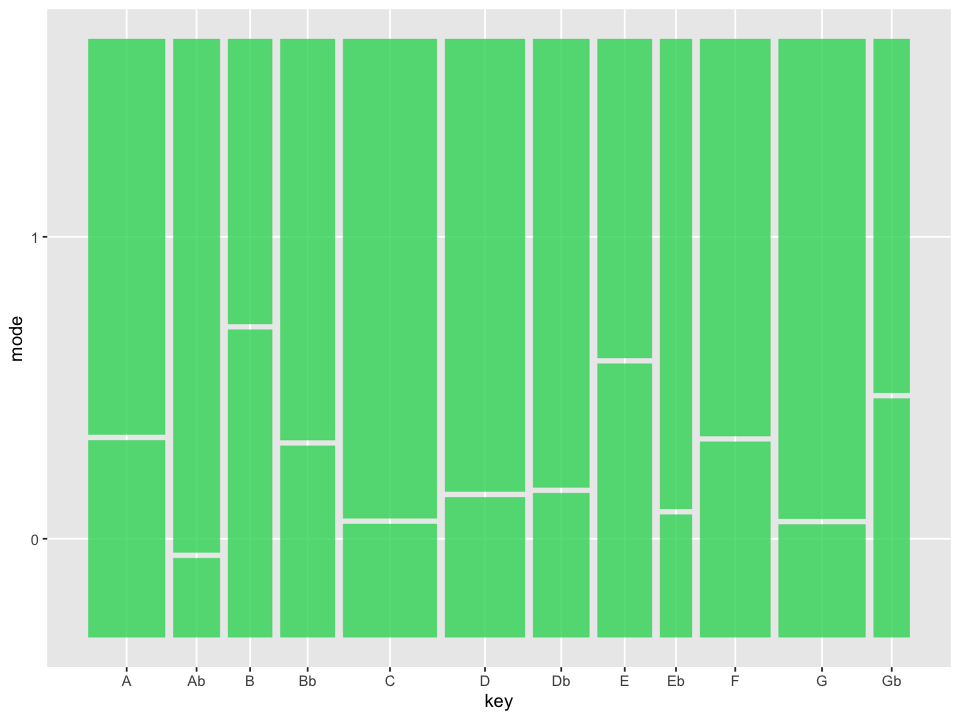

In [19]:
library(ggmosaic)
songs %>%
ggplot() +
    geom_mosaic(aes(product(mode, key)), fill='#2FD565')

## Principal component analysis

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



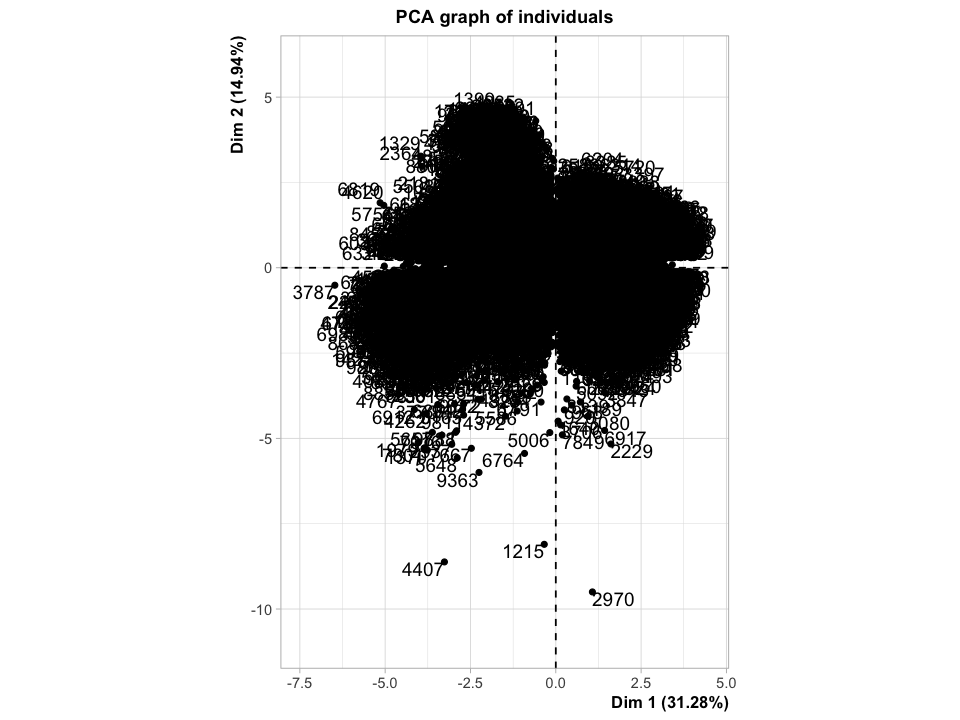

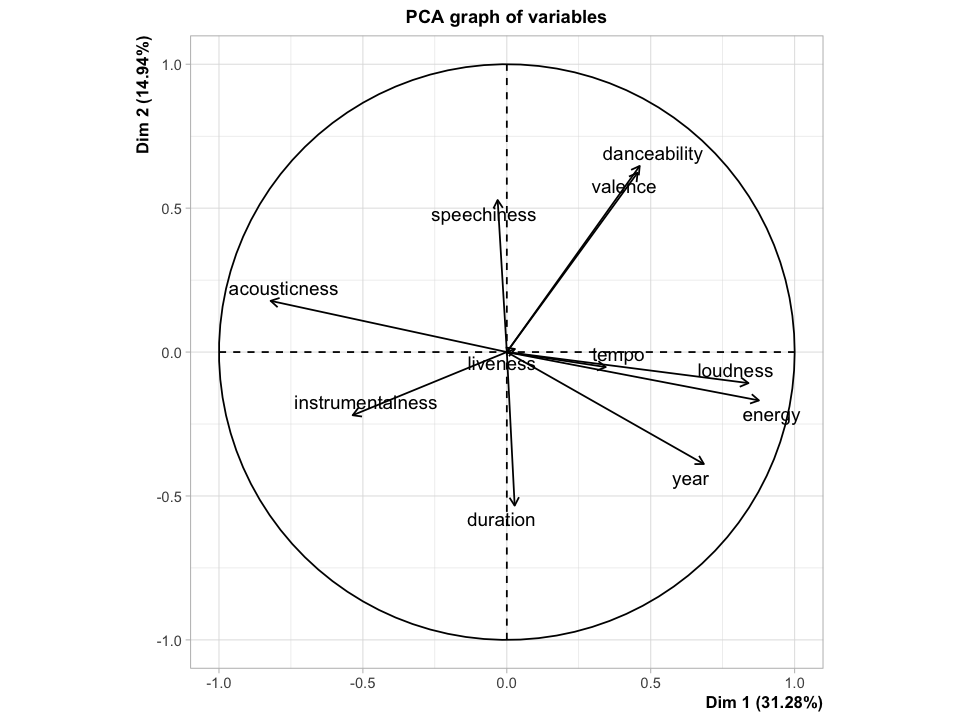

In [20]:
library(FactoMineR)
library(factoextra)
res.pca <- songs.quant %>% 
    select(!popularity) %>% 
    PCA(ncp=11)

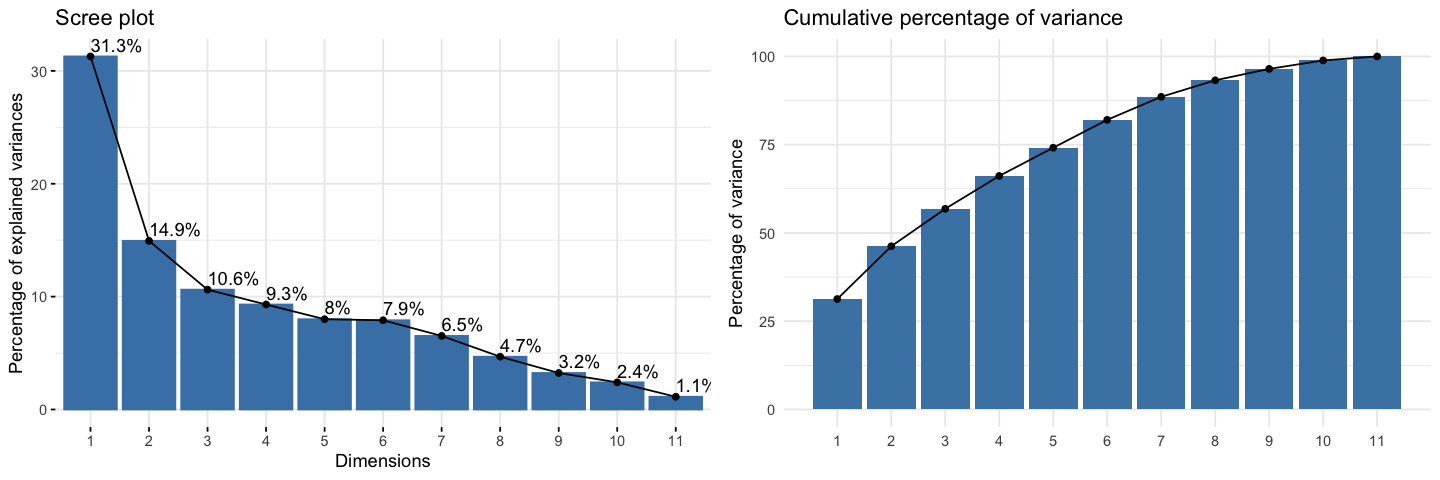

In [21]:
fig(12,4)
g1 <- fviz_eig(res.pca, addlabels=TRUE, ncp=11)

g2 <- tibble(pc=c(1:11), eig=res.pca$eig[1:11,3]) %>%
ggplot(aes(pc, eig)) + 
    geom_bar(stat="identity", fill='#4984B3') +
    geom_line() + 
    geom_point() +
    scale_x_continuous(breaks=c(1:11), minor_breaks=NULL) +
    labs(x='', y='Percentage of variance', title='Cumulative percentage of variance') +
    theme_minimal()

grid.arrange(g1, g2, nrow=1)

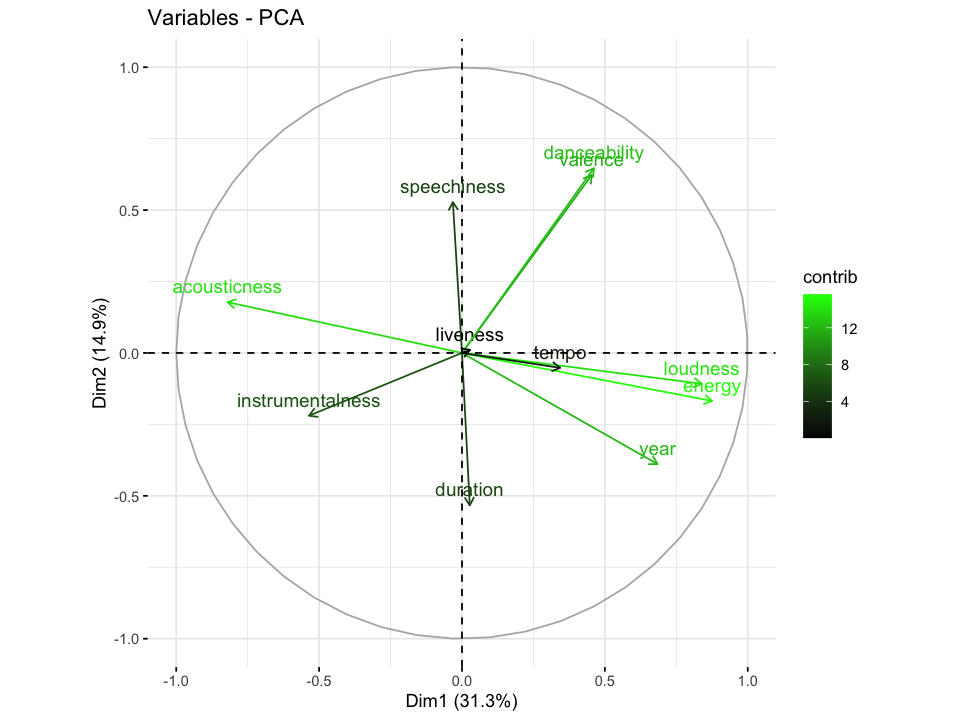

In [22]:
fig(8,6)
fviz_pca_var(res.pca, col.var="contrib") +
    scale_color_gradient(low="black", high="green")

Warning message:
“Removed 12 rows containing missing values (geom_point).”


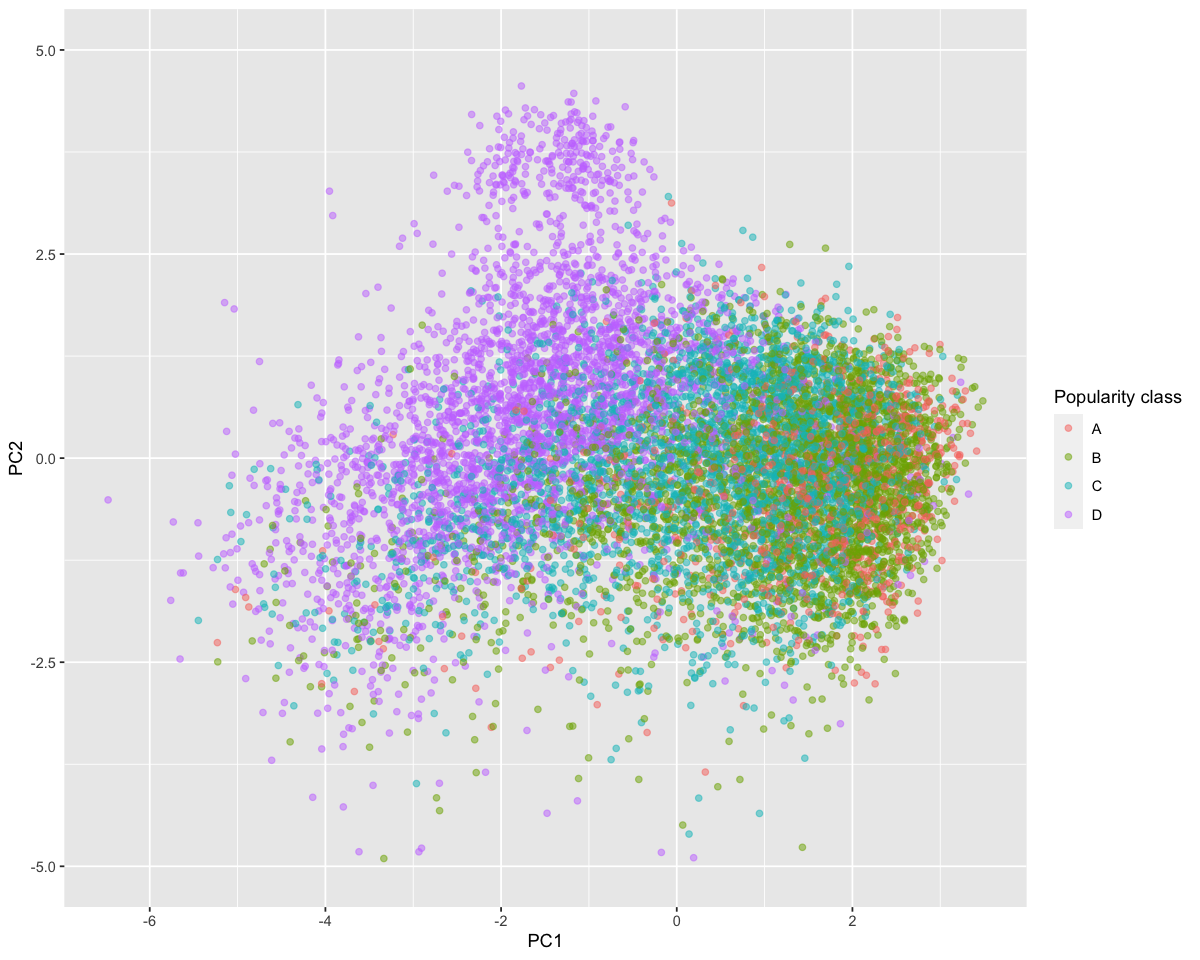

In [23]:
name_func <- function(name) {
    paste('PC', substring(name, first=5), sep='')
}

pca.ind <- as_tibble(res.pca$ind$coord) %>%
    rename_with(name_func, everything()) %>%
    mutate(pop.class=songs$pop.class)

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}
colors <- gg_color_hue(4)

fig(10,8)
ggplot(pca.ind) + 
    geom_point(aes(x=PC1, y=PC2, color=pop.class), alpha=.5) +
    scale_y_continuous(limits=c(-5,5)) +
    labs(color="Popularity class")

Warning message:
“Removed 9670 rows containing missing values (geom_point).”
Warning message:
“Removed 9677 rows containing missing values (geom_text).”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Cal

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': d

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 58.3 & Часть 59.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': d

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 66.3 & Часть 67.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 112.3 & Часть 113.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 112.3 & Часть 113.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 112.3 & Часть 113.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 112.3 & Часть 113.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 112.3 & Часть 113.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warni

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 82.4 & Часть 83.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 82.4 & Часть 83.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 82.4 & Часть 83.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 82.4 & Часть 83.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 82.4 & Часть 83.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.4 & Часть 34.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 18.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bc>”
Warni

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 173.4 & Часть 174.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warni

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 169.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 169.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 169.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 169.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 169.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 208.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4.3 & Часть 5.1 - На Западном фронте без перемен' in 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 21.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 21.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 21.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 21.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 21.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in g

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 84.4 & Часть 85.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 154.4 & Часть 155.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 154.4 & Часть 155.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 154.4 & Часть 155.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 154.4 & Часть 155.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 154.4 & Часть 155.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warni

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.2 & Часть 75.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.2 & Часть 75.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.2 & Часть 75.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.2 & Часть 75.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.2 & Часть 75.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.2 & Часть 75.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': d

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.4 & Часть 11.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 69.4 & Часть 70.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 69.4 & Часть 70.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 69.4 & Часть 70.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 69.4 & Часть 70.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 69.4 & Часть 70.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 224.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 224.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 224.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 224.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 224.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 20.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.4 & Часть 60.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.4 & Часть 60.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.4 & Часть 60.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.4 & Часть 60.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.4 & Часть 60.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 27.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 27.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 27.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 27.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 27.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 41.4 & Часть 42.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 41.4 & Часть 42.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <a4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 41.4 & Часть 42.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 41.4 & Часть 42.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 41.4 & Часть 42.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 232.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 232.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 232.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 232.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 232.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 129.4 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <9d>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.4 & Часть 13.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 & Часть 36.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 & Часть 36.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 & Часть 36.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 & Часть 36.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 35.3 & Часть 36.1 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 36.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 36.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 36.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 36.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 36.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.C

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.C

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 3.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.C

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': d

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 70.3 & Часть 71.1 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 51.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot subst

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 51.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 51.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 51.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 51.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 51.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 231.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 231.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 231.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 231.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 231.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 104.4 & Часть 105.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 104.4 & Часть 105.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 104.4 & Часть 105.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 104.4 & Часть 105.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 104.4 & Часть 105.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substit

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 77.4 & Часть 78.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 77.4 & Часть 78.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 77.4 & Часть 78.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 77.4 & Часть 78.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 77.4 & Часть 78.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 30.4 & Часть 31.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 30.4 & Часть 31.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$la

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 226.5 & Часть 227.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 226.5 & Часть 227.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 226.5 & Часть 227.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 226.5 & Часть 227.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 226.5 & Часть 227.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warni

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <9d>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 64.4 & Часть 65.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.10 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <8b>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 180.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 180.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 180.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 180.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 180.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 172.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 172.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 172.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 172.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 172.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Αχ Μπριγκίτα!' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Αχ Μπριγκίτα!' in 'mbcsToSbcs': dot substituted for <91>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Αχ Μπριγκίτα!' in 'mbcsToSbcs': dot substituted for <cf>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Αχ Μπριγκίτα!' in 'mbcsToSbcs': dot substituted for <87>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Αχ Μπριγκίτα!' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Αχ Μπριγκίτα!' in 'mbcsToSbcs': dot substituted for <9c>

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 47.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 47.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 47.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 47.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 47.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.3 & Часть 69.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 80.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 80.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 80.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 80.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 80.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 95.4 & Часть 96.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 95.4 & Часть 96.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 95.4 & Часть 96.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 95.4 & Часть 96.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 95.4 & Часть 96.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 95.4 & Часть 96.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 7.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <9e>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 7.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 7.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 7.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 7.3 - Обратный путь' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 174.3 & Часть 175.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 174.3 & Часть 175.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 174.3 & Часть 175.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 174.3 & Часть 175.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 174.3 & Часть 175.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substit

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <84>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.4 & Часть 62.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 & Часть 56.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 & Часть 56.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 & Часть 56.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 & Часть 56.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 & Часть 56.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 239.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 239.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 239.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 239.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 239.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 92.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 14.3 & Часть 15.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 14.3 & Часть 15.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 14.3 & Часть 15.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 14.3 & Часть 15.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 14.3 & Часть 15.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 61.2 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <9d>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 116.2 & Часть 117 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 196.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 196.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 196.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 196.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 196.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 8.6 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 8.6 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 8.6 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 8.6 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 8.6 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.C

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 23.3 & Часть 24.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 76.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 76.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 76.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 76.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 73.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.5 & Часть 35.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.5 & Часть 35.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <a4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.5 & Часть 35.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.5 & Часть 35.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.5 & Часть 35.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 97.5 & Часть 98.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 97.5 & Часть 98.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 97.5 & Часть 98.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 97.5 & Часть 98.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 97.5 & Часть 98.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 38.2 - Фиеста' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 - Обратный путь' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 55.4 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <9d>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 93.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.3 & Часть 53.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.3 & Часть 53.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.3 & Часть 53.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.3 & Часть 53.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.3 & Часть 53.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 24.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 24.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 24.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 24.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 24.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 240.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in g

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 15.5 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in g

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 74.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 2.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 40.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <b6>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 33.3 & Часть 34.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 65.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 65.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 65.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 65.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 65.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 39.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 9.6 & Часть 10.1 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 9.6 & Часть 10.1 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 9.6 & Часть 10.1 - Обратный путь' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 9.6 & Часть 10.1 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 9.6 & Часть 10.1 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 17.2 - Старик и море' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 38.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 38.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 38.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 38.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 38.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 & Часть 43.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 & Часть 43.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 & Часть 43.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 & Часть 43.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 & Часть 43.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.5 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.5 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.5 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.5 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.5 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 158.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 158.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 158.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 158.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 158.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 12.3 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 81.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 81.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 81.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 81.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 81.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.6 & Часть 11.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.6 & Часть 11.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.6 & Часть 11.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.6 & Часть 11.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.6 & Часть 11.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 28.3 & Часть 29.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 & Часть 45.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 & Часть 45.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 & Часть 45.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 & Часть 45.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.2 & Часть 45.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 88.4 & Часть 89.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 88.4 & Часть 89.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 88.4 & Часть 89.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 88.4 & Часть 89.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 88.4 & Часть 89.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <82>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 83.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 60.4 & Часть 61.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 177.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 177.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 177.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 177.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 177.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <84>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 10.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.4 & Часть 14.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.4 & Часть 14.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.4 & Часть 14.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.4 & Часть 14.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 13.4 & Часть 14.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.3 & Часть 45.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.3 & Часть 45.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.3 & Часть 45.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.3 & Часть 45.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.3 & Часть 45.1 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 1.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 1.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 1.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 1.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 1.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text,

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 42.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 11.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 54.3 - Зеленые холмы Африки' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 53.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 53.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 53.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 53.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 53.2 - Обратный путь' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 16.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 16.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 16.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 16.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 16.2 - Другие голоса, другие комнаты' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in g

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 59.2 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.2 & Часть 53.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.2 & Часть 53.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.2 & Часть 53.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.2 & Часть 53.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 52.2 & Часть 53.1 - Прощай оружие' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text,

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 5.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text,

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 71.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 71.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 71.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 71.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 71.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 19.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 19.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 19.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 19.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 19.6 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 68.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 63.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 50.2 & Часть 51.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 50.2 & Часть 51.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 50.2 & Часть 51.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 50.2 & Часть 51.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 50.2 & Часть 51.1 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 4

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 26.3 & Часть 27.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 26.3 & Часть 27.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 26.3 & Часть 27.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 26.3 & Часть 27.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 26.3 & Часть 27.1 - Фиеста' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 67.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 200.4 & Часть 201.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 200.4 & Часть 201.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 200.4 & Часть 201.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 200.4 & Часть 201.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 200.4 & Часть 201.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warni

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 72.3 & Часть 73.1 - На Западном фронте без пе

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 153.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 153.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 153.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 153.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 153.3 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 189.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 189.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 189.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 189.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 189.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphi

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 34.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 6.2 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in g

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 75.3 - За рекой, в тени деревьев' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 99.4 & Часть 100.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graph

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 99.4 & Часть 100.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 99.4 & Часть 100.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 99.4 & Часть 100.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 99.4 & Часть 100.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 99.4 & Часть 100.1 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning me

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 238.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 238.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 238.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 238.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <8f>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 238.3 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 215.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 215.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <a7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 215.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 215.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 215.2 - Триумфальная арка' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <82>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 57.3 - На Западном фронте без перемен' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <bf>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <83>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 44.5 - Обратный путь' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fai

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 98.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 98.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 98.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 98.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Часть 98.2 - По ком звонит колокол' in 'mbcsToSbcs': dot substituted for <ba>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnn

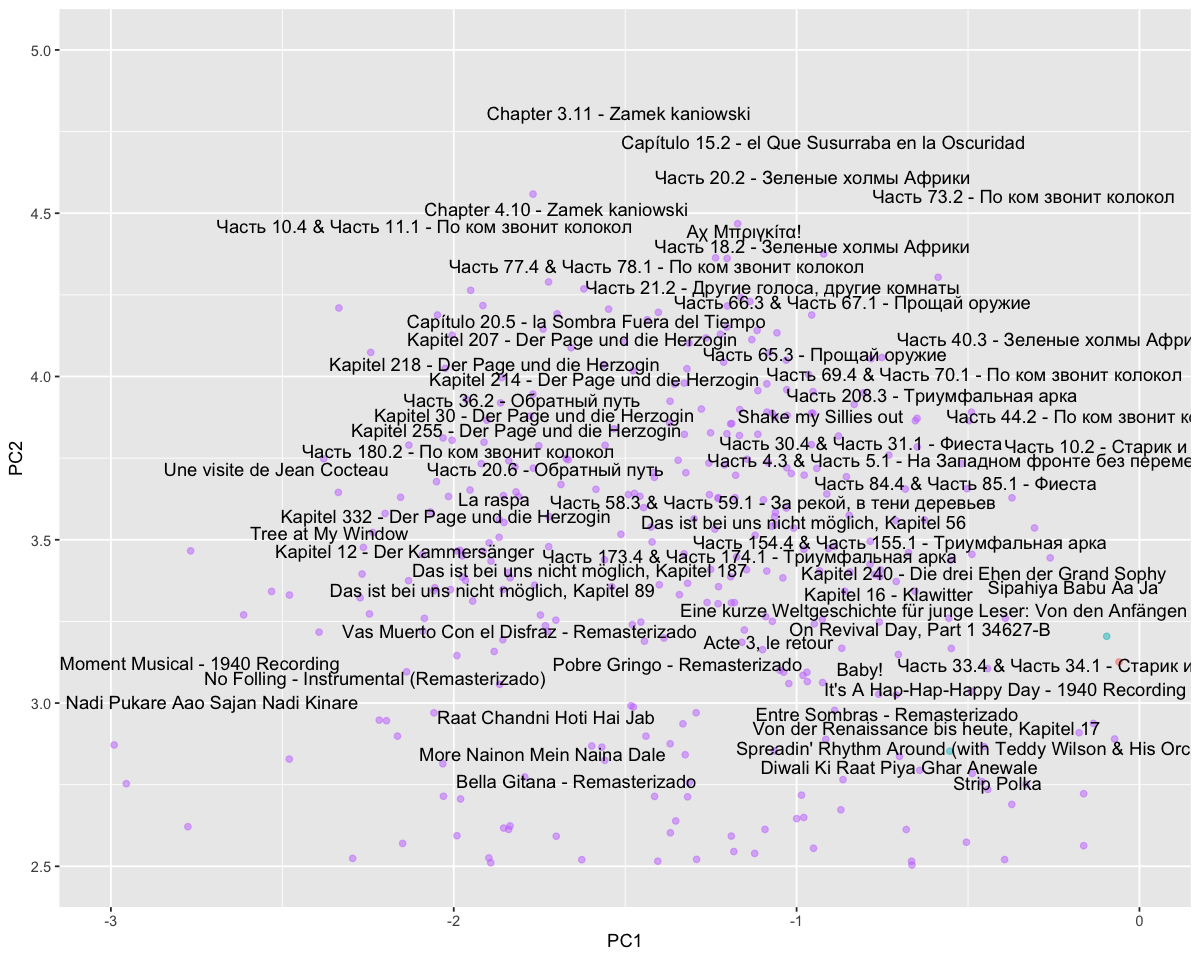

In [24]:
name_func <- function(name) {
    paste('PC', substring(name, first=5), sep='')
}

pca.ind <- as_tibble(res.pca$ind$coord) %>%
    rename_with(name_func, everything()) %>%
    mutate(pop.class=songs$pop.class)

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}
colors <- gg_color_hue(4)

fig(10,8)
ggplot(pca.ind) + 
    geom_point(aes(x=PC1, y=PC2, color=pop.class), alpha=.5) +
    scale_x_continuous(limits=c(-3,0)) +
    scale_y_continuous(limits=c(2.5,5)) +
    labs(color="Popularity class") +
    geom_text(aes(label=songs$name, x=PC1, y=PC2), nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T) +
    guides(color="none")

# Classification models

In [25]:
data_split <- songs %>%
    select(!c(popularity, name)) %>%
    initial_split(strata = pop.class, prop = 0.75)

songs_train <- training(data_split)
songs_test <- testing(data_split)

## Logistic regression

In [53]:
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1



### Without regularization

In [54]:
log_reg <- multinom_reg(penalty = 0) %>%
    set_engine('glmnet')

In [55]:
log_reg_fit <-
    log_reg %>%
    set_engine('glmnet') %>%
    fit(pop.class ~ ., 
        data=songs_train)

#tidy(log_reg_fit) %>% filter(estimate > 0)

In [56]:
log_reg_results <- 
  songs_test %>%
  select(pop.class) %>%
  bind_cols(
    predict(log_reg_fit, new_data = songs_test %>% select(-pop.class))
  )

In [91]:
summary(log_reg_results)

 pop.class .pred_class
 A:252     A: 60      
 B:716     B:848      
 C:730     C:784      
 D:802     D:808      

In [57]:
log_reg_results %>%
    conf_mat(truth=pop.class, estimate=.pred_class)

log_reg_results %>%
    precision(pop.class, .pred_class)

          Truth
Prediction   A   B   C   D
         A  42  14   1   3
         B 185 507 149   7
         C  24 184 499  77
         D   1  11  81 715

ERROR: Error in is.factor(reference): object 'pop.class' not found


### With regularization

In [ ]:
log_reg <- multinom_reg(penalty = .004, mixture=1) %>%
    set_engine('glmnet')

In [ ]:
log_reg_fit <-
    log_reg %>%
    set_engine('glmnet') %>%
    fit(pop.class ~ ., 
        data=songs_train)

tidy(log_reg_fit) %>% filter(estimate > 0)

In [ ]:
log_reg_results <- 
  songs_test %>%
  select(pop.class) %>%
  bind_cols(
    predict(log_reg_fit, new_data = songs_test %>% select(-pop.class))
  )

In [ ]:
log_reg_results %>%
    conf_mat(truth=pop.class, estimate=.pred_class)

log_reg_results %>%
    precision(pop.class, .pred_class)

In [ ]:
log_reg <- multinom_reg(penalty = tune()) %>%
    set_engine('glmnet')

In [ ]:
songs_rec <- recipe(pop.class ~ ., data = songs_train)# %>%
  #step_normalize(all_numeric(), -all_outcomes())

songs_prep <- songs_rec %>%
  prep()

In [ ]:
lasso_spec <- multinom_reg(penalty = 0.1, mixture = 1) %>%
  set_engine("glmnet")

wf <- workflow() %>%
  add_recipe(songs_rec)

#lasso_fit <- wf %>%
#  add_model(lasso_spec) %>%
#  fit(data = songs_train)

#lasso_fit %>%
#  pull_workflow_fit() %>%
#  tidy()

## SMV

In [ ]:
svm_mod <-
  svm_rbf(cost = tune(), rbf_sigma = tune()) %>%
  set_mode("classification") %>%
  set_engine("kernlab")

In [ ]:
songs_rec <-
  recipe(pop.class ~ ., data = songs_train)  %>%
  # remove any zero variance predictors
  step_zv(all_predictors()) %>% 
  # remove any linear combinations
  step_lincomb(all_numeric())

In [ ]:
songs_rs <- bootstraps(songs_train, times = 5)

In [ ]:
roc_vals <- metric_set(roc_auc)
ctrl <- control_grid(verbose = FALSE, save_pred = TRUE)

In [ ]:
formula_res <-
  svm_mod %>% 
  tune_grid(
    pop.class ~ .,
    resamples = songs_rs#,
#    metrics = roc_vals,
#    control = ctrl
  )
#formula_res

In [ ]:
formula_res